<a href="https://colab.research.google.com/github/amirgarsha/ann_MK/blob/main/MK_ann_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [37]:
import matplotlib.pyplot as plt
import numpy as np


##Regression

In [38]:
## check dataset
california_housing = fetch_california_housing()

In [39]:
## split data
X_train0, X_test, y_train0,  y_test = train_test_split(california_housing["data"],
                                                    california_housing["target"])

In [40]:
## split train to train and validation
X_train1, X_validation, y_train1, y_validation = train_test_split(X_train0,
                                                                  y_train0)

In [41]:
## check shape of train and test
print(X_train1.shape)
print(X_test.shape)
print(X_validation.shape)

(11610, 8)
(5160, 8)
(3870, 8)


In [42]:
## Standardization
sc = StandardScaler()
X_train_s = sc.fit_transform(X_train1)
X_validation_s = sc.transform(X_validation)
X_test_s = sc.transform(X_test)

Create Model

In [43]:
## create Model
model = keras.models.Sequential([
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(1)]
)

In [44]:
model.compile(loss="mean_squared_error",
              optimizer="sgd",
              metrics=["mean_absolute_error"])

In [45]:
history = model.fit(X_train_s, y_train1, epochs=30, validation_data=(X_validation_s, y_validation))

Epoch 1/30
363/363 [==============================] - 2s 3ms/step - loss: 0.8858 - mean_absolute_error: 0.6117 - val_loss: 0.5478 - val_mean_absolute_error: 0.5204
Epoch 2/30
363/363 [==============================] - 1s 3ms/step - loss: 0.4642 - mean_absolute_error: 0.4931 - val_loss: 0.4720 - val_mean_absolute_error: 0.4787
Epoch 3/30
363/363 [==============================] - 1s 4ms/step - loss: 0.4231 - mean_absolute_error: 0.4664 - val_loss: 0.4498 - val_mean_absolute_error: 0.4620
Epoch 4/30
363/363 [==============================] - 1s 4ms/step - loss: 0.4029 - mean_absolute_error: 0.4536 - val_loss: 0.4317 - val_mean_absolute_error: 0.4574
Epoch 5/30
363/363 [==============================] - 1s 4ms/step - loss: 0.3879 - mean_absolute_error: 0.4444 - val_loss: 0.4243 - val_mean_absolute_error: 0.4554
Epoch 6/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3790 - mean_absolute_error: 0.4390 - val_loss: 0.4197 - val_mean_absolute_error: 0.4474
Epoch 7/30
363/3

## Functional API

In [46]:
X_train0.shape[1:]

(8,)

In [47]:
input_layer = keras.layers.Input(shape=X_train1.shape[1:])
hidden_layer_1 = keras.layers.Dense(50, activation="relu")(input_layer)
hidden_layer_2 = keras.layers.Dense(10, activation="relu")(hidden_layer_1)
cancatenate_layer = keras.layers.Concatenate()([input_layer, hidden_layer_2])
output_layer = keras.layers.Dense(1)(cancatenate_layer)
model_conc = keras.Model(inputs=[input_layer], outputs=[output_layer])


In [48]:
model_conc.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 dense_18 (Dense)            (None, 50)                   450       ['input_6[0][0]']             
                                                                                                  
 dense_19 (Dense)            (None, 10)                   510       ['dense_18[0][0]']            
                                                                                                  
 concatenate_3 (Concatenate  (None, 18)                   0         ['input_6[0][0]',             
 )                                                                   'dense_19[0][0]']      

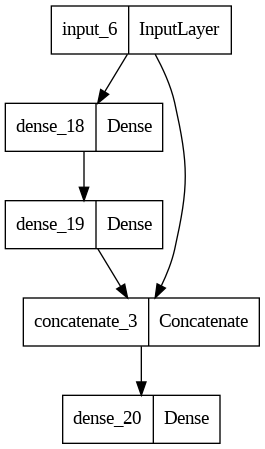

In [49]:
keras.utils.plot_model(model_conc, "model_pic.png")

In [50]:
model_conc.compile(loss="mean_squared_error",
                   optimizer="sgd",
                   metrics="mean_absolute_error")

In [51]:
model_conc.fit(X_train_s, y_train1, epochs = 30,
               validation_data = (X_validation_s, y_validation) )

Epoch 1/30
363/363 [==============================] - 2s 3ms/step - loss: 0.8828 - mean_absolute_error: 0.6369 - val_loss: 2.9192 - val_mean_absolute_error: 0.6090
Epoch 2/30
363/363 [==============================] - 1s 3ms/step - loss: 4.0574 - mean_absolute_error: 0.6604 - val_loss: 25.9277 - val_mean_absolute_error: 0.9228
Epoch 3/30
363/363 [==============================] - 1s 3ms/step - loss: 21.8466 - mean_absolute_error: 0.8108 - val_loss: 31.5654 - val_mean_absolute_error: 0.6698
Epoch 4/30
363/363 [==============================] - 1s 3ms/step - loss: 38210.6797 - mean_absolute_error: 8.6225 - val_loss: 1246.2633 - val_mean_absolute_error: 5.3392
Epoch 5/30
363/363 [==============================] - 1s 3ms/step - loss: 598.8445 - mean_absolute_error: 2.7404 - val_loss: 1696.8026 - val_mean_absolute_error: 5.0931
Epoch 6/30
363/363 [==============================] - 1s 3ms/step - loss: 1296.3651 - mean_absolute_error: 2.7590 - val_loss: 2174.6895 - val_mean_absolute_error: 4.

## funcitonal API with multiple input

In [52]:
X_train_s_1, X_train_s_2 = X_train_s[: , :6], X_train_s[: , -4:]
X_validation_s_1, X_validation_s_2 = X_validation_s[: , :6], X_validation_s[: , -4:]
X_test_s_1, X_test_s_2 = X_test_s[: , :6], X_test_s[: , -4:]

In [53]:
input_layer_1 = keras.layers.Input(shape=[6])
input_layer_2 = keras.layers.Input(shape=[4])
hidden_layer_1 = keras.layers.Dense(50, activation="relu")(input_layer_1)
hidden_layer_2 = keras.layers.Dense(10, activation="relu")(hidden_layer_1)
concatenation_layer = keras.layers.Concatenate()([input_layer_2, hidden_layer_2])
output_layer = keras.layers.Dense(1)(concatenation_layer)
model_multiple = keras.Model(inputs=[input_layer_1, input_layer_2], outputs=[output_layer])

In [54]:
model_multiple.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 6)]                  0         []                            
                                                                                                  
 dense_21 (Dense)            (None, 50)                   350       ['input_7[0][0]']             
                                                                                                  
 input_8 (InputLayer)        [(None, 4)]                  0         []                            
                                                                                                  
 dense_22 (Dense)            (None, 10)                   510       ['dense_21[0][0]']            
                                                                                            

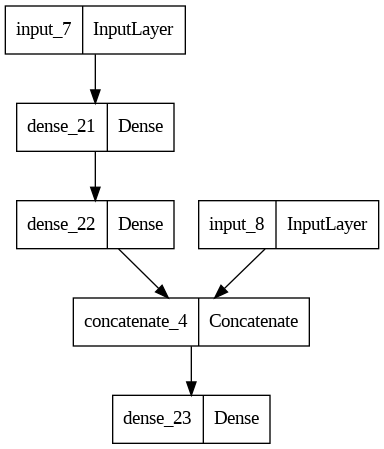

In [55]:
keras.utils.plot_model(model_multiple, "multiple_model.png")

In [56]:
model_multiple.compile(loss="mean_squared_error",
                       optimizer="sgd",
                       metrics="mean_absolute_error")

In [57]:
model_multiple.fit((X_train_s_1, X_train_s_2), y_train1, epochs = 30,
                   validation_data=((X_validation_s_1,X_validation_s_2), y_validation))

Epoch 1/30
363/363 [==============================] - 2s 3ms/step - loss: 4.2955 - mean_absolute_error: 0.6815 - val_loss: 3.0237 - val_mean_absolute_error: 0.5385
Epoch 2/30
363/363 [==============================] - 1s 3ms/step - loss: 15.4096 - mean_absolute_error: 0.5776 - val_loss: 3.0392 - val_mean_absolute_error: 0.5470
Epoch 3/30
363/363 [==============================] - 1s 3ms/step - loss: 1.9370 - mean_absolute_error: 0.4937 - val_loss: 3.7205 - val_mean_absolute_error: 0.5196
Epoch 4/30
363/363 [==============================] - 1s 3ms/step - loss: 32.9929 - mean_absolute_error: 0.7123 - val_loss: 5.1891 - val_mean_absolute_error: 0.6811
Epoch 5/30
363/363 [==============================] - 1s 3ms/step - loss: 3.9692 - mean_absolute_error: 0.5333 - val_loss: 6.5031 - val_mean_absolute_error: 0.5267
Epoch 6/30
363/363 [==============================] - 1s 3ms/step - loss: 75.0603 - mean_absolute_error: 0.8313 - val_loss: 8.5787 - val_mean_absolute_error: 0.5872
Epoch 7/30
36

## with multiple output

In [58]:
input_layer_1 = keras.layers.Input(shape=[6])
input_layer_2 = keras.layers.Input(shape=[4])
hidden_layer_1 = keras.layers.Dense(50, activation="relu")(input_layer_1)
hidden_layer_2 = keras.layers.Dense(10, activation="relu")(hidden_layer_1)
concatenation_layer = keras.layers.Concatenate()([input_layer_2, hidden_layer_2])
output_layer = keras.layers.Dense(1, name="output_layer")(concatenation_layer)
helper_output = keras.layers.Dense(1,name = "helper_output")(hidden_layer_2)
model_multiple_output = keras.Model(inputs=[input_layer_1, input_layer_2], outputs=[output_layer, helper_output])

In [59]:
model_multiple_output.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_9 (InputLayer)        [(None, 6)]                  0         []                            
                                                                                                  
 dense_24 (Dense)            (None, 50)                   350       ['input_9[0][0]']             
                                                                                                  
 input_10 (InputLayer)       [(None, 4)]                  0         []                            
                                                                                                  
 dense_25 (Dense)            (None, 10)                   510       ['dense_24[0][0]']            
                                                                                            

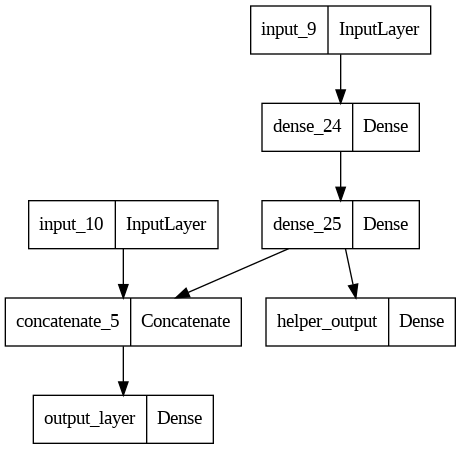

In [60]:
keras.utils.plot_model(model_multiple_output, "multiple_model.png")

In [61]:
model_multiple_output.compile(loss=["mse", "mse"],
                              loss_weights = [0.8, 0.2],
                              optimizer="sgd",
                              metrics=["mae"])

In [62]:
model_multiple_output.fit((X_train_s_1, X_train_s_2), (y_train1, y_train1), epochs = 30,
                   validation_data=((X_validation_s_1,X_validation_s_2), (y_validation,y_validation)))

Epoch 1/30
363/363 [==============================] - 3s 6ms/step - loss: 2.6059 - output_layer_loss: 2.7571 - helper_output_loss: 2.0013 - output_layer_mae: 0.7492 - helper_output_mae: 0.9824 - val_loss: 1.3564 - val_output_layer_loss: 1.5030 - val_helper_output_loss: 0.7704 - val_output_layer_mae: 0.5622 - val_helper_output_mae: 0.6331
Epoch 2/30
363/363 [==============================] - 1s 3ms/step - loss: 3.4529 - output_layer_loss: 4.1192 - helper_output_loss: 0.7875 - output_layer_mae: 0.6099 - helper_output_mae: 0.6246 - val_loss: 2.9687 - val_output_layer_loss: 3.5637 - val_helper_output_loss: 0.5887 - val_output_layer_mae: 0.5915 - val_helper_output_mae: 0.5648
Epoch 3/30
363/363 [==============================] - 1s 3ms/step - loss: 14.7406 - output_layer_loss: 18.2820 - helper_output_loss: 0.5748 - output_layer_mae: 0.6208 - helper_output_mae: 0.5690 - val_loss: 0.6074 - val_output_layer_loss: 0.6169 - val_helper_output_loss: 0.5697 - val_output_layer_mae: 0.5422 - val_help

## Subclass Model

In [63]:
class WideAndDeepAnn(keras.Model):
  def __init__(self, activation="relu", **kwargs):
    super().__init__(**kwargs)
    self.hidden_layer1 = keras.layers.Dense(50, activation = activation)
    self.hidden_layer2 = keras.layers.Dense(10, activation = activation)
    self.final_output = keras.layers.Dense(1)
    self.helper_output = keras.layers.Dense(1)

  def call(self, inputs):
    input_1, input_2 = inputs
    h1_out = self.hidden_layer1(input_1)
    h2_out = self.hidden_layer2(h1_out)
    concat_out = keras.layers.concatenate([input_1, h2_out])
    final_output = self.final_output(concat_out)
    helper_output = self.helper_output(h2_out)
    return final_output, helper_output



In [64]:
subclass_model = WideAndDeepAnn()

In [65]:
subclass_model.compile(loss=["mse", "mse"],
                              loss_weights = [0.8, 0.2],
                              optimizer="sgd",
                              metrics=["mae"])

In [66]:
subclass_model.fit((X_train_s_1, X_train_s_2), (y_train1, y_train1), epochs = 30,
                   validation_data=((X_validation_s_1,X_validation_s_2), (y_validation,y_validation)))

Epoch 1/30
363/363 [==============================] - 3s 6ms/step - loss: 3.8006 - output_1_loss: 4.2199 - output_2_loss: 2.1234 - output_1_mae: 0.7765 - output_2_mae: 1.0085 - val_loss: 3.2712 - val_output_1_loss: 3.9074 - val_output_2_loss: 0.7262 - val_output_1_mae: 0.6133 - val_output_2_mae: 0.6370
Epoch 2/30
363/363 [==============================] - 1s 4ms/step - loss: 18.1401 - output_1_loss: 22.5185 - output_2_loss: 0.6261 - output_1_mae: 0.7315 - output_2_mae: 0.5970 - val_loss: 0.7136 - val_output_1_loss: 0.7329 - val_output_2_loss: 0.6366 - val_output_1_mae: 0.5697 - val_output_2_mae: 0.5805
Epoch 3/30
363/363 [==============================] - 1s 3ms/step - loss: 0.5807 - output_1_loss: 0.5833 - output_2_loss: 0.5702 - output_1_mae: 0.5401 - output_2_mae: 0.5597 - val_loss: 0.5787 - val_output_1_loss: 0.5746 - val_output_2_loss: 0.5950 - val_output_1_mae: 0.5432 - val_output_2_mae: 0.5619
Epoch 4/30
363/363 [==============================] - 1s 3ms/step - loss: 0.5181 - out

## saving Models

In [67]:
model.save("model_regression.h5")
model_conc.save("model_conc_regression.h5")
model_multiple.save("model_multiple_regressin.h5")
model_multiple_output.save("model_multiple_output_regression.h5")
subclass_model.save_weights("model_subclass_regression.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [68]:
model_from = keras.models.load_model("model_regression.h5")

In [69]:
model_from.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 50)                450       
                                                                 
 dense_16 (Dense)            (None, 10)                510       
                                                                 
 dense_17 (Dense)            (None, 1)                 11        
                                                                 
Total params: 971 (3.79 KB)
Trainable params: 971 (3.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## CALLBACK

In [70]:
model_checkpoint_callback = keras.callbacks.ModelCheckpoint("model_cb_reg_housing",
                                                            save_best_only = True,)
early_stopping_callback = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [71]:
model.fit(X_train_s, y_train1, epochs=50, validation_data=(X_validation_s, y_validation),
          callbacks=[model_checkpoint_callback, early_stopping_callback])

Epoch 1/50
363/363 [==============================] - 3s 8ms/step - loss: 0.2965 - mean_absolute_error: 0.3845 - val_loss: 0.3380 - val_mean_absolute_error: 0.4051
Epoch 2/50
363/363 [==============================] - 2s 4ms/step - loss: 0.2955 - mean_absolute_error: 0.3840 - val_loss: 0.3433 - val_mean_absolute_error: 0.4121
Epoch 3/50
363/363 [==============================] - 2s 4ms/step - loss: 0.2944 - mean_absolute_error: 0.3819 - val_loss: 0.3351 - val_mean_absolute_error: 0.3900
Epoch 4/50
363/363 [==============================] - 1s 3ms/step - loss: 0.2920 - mean_absolute_error: 0.3826 - val_loss: 0.3415 - val_mean_absolute_error: 0.3913
Epoch 5/50
363/363 [==============================] - 1s 3ms/step - loss: 0.2904 - mean_absolute_error: 0.3794 - val_loss: 0.3353 - val_mean_absolute_error: 0.3950
Epoch 6/50
363/363 [==============================] - 2s 4ms/step - loss: 0.2907 - mean_absolute_error: 0.3791 - val_loss: 0.3254 - val_mean_absolute_error: 0.3902
Epoch 7/50
363/3